In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df_jab = pd.read_csv('data/test/10JAB25HZ.csv')

In [3]:
df_jab.head(10)

,epoc (ms),timestamp (-0800),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1572895549272,2019-11-04T11.25.49.272,0.000,0.178,0.733,0.671
1,1572895549312,2019-11-04T11.25.49.312,0.040,0.178,0.744,0.650
2,1572895549352,2019-11-04T11.25.49.352,0.080,0.179,0.749,0.648
3,1572895549391,2019-11-04T11.25.49.391,0.119,0.183,0.770,0.628
4,1572895549431,2019-11-04T11.25.49.431,0.159,0.161,0.784,0.601
5,1572895549470,2019-11-04T11.25.49.470,0.198,0.144,0.776,0.593
6,1572895549510,2019-11-04T11.25.49.510,0.238,0.136,0.776,0.604
7,1572895549549,2019-11-04T11.25.49.549,0.277,0.134,0.804,0.596
8,1572895549589,2019-11-04T11.25.49.589,0.317,0.167,0.841,0.615
9,1572895549628,2019-11-04T11.25.49.628,0.356,0.179,0.844,0.616


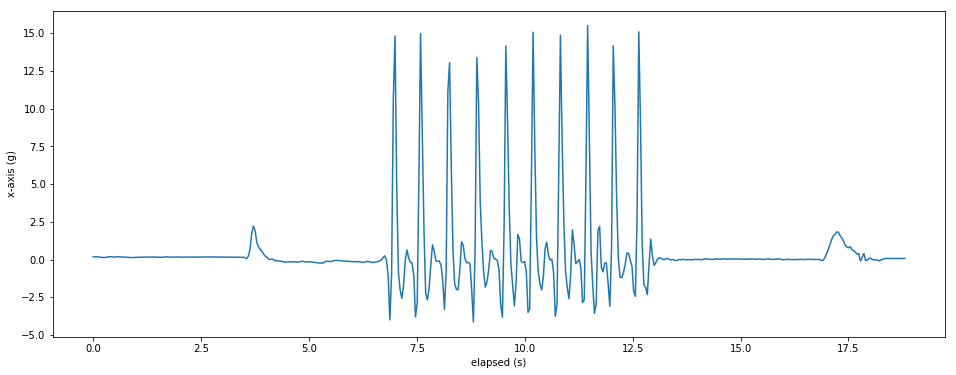

In [4]:
plt.figure(figsize=(16, 6))
sb.lineplot(df_jab["elapsed (s)"],df_jab["x-axis (g)"])

In [5]:
df_jab["magnitude"] = np.sqrt(df_jab["x-axis (g)"]**2+df_jab["y-axis (g)"]**2+df_jab["z-axis (g)"]**2)

In [6]:
df_jab.head(10)

,epoc (ms),timestamp (-0800),elapsed (s),x-axis (g),y-axis (g),z-axis (g),magnitude
0,1572895549272,2019-11-04T11.25.49.272,0.000,0.178,0.733,0.671,1.009561
1,1572895549312,2019-11-04T11.25.49.312,0.040,0.178,0.744,0.650,1.003853
2,1572895549352,2019-11-04T11.25.49.352,0.080,0.179,0.749,0.648,1.006452
3,1572895549391,2019-11-04T11.25.49.391,0.119,0.183,0.770,0.628,1.010333
4,1572895549431,2019-11-04T11.25.49.431,0.159,0.161,0.784,0.601,1.000889
5,1572895549470,2019-11-04T11.25.49.470,0.198,0.144,0.776,0.593,0.987199
6,1572895549510,2019-11-04T11.25.49.510,0.238,0.136,0.776,0.604,0.992717
7,1572895549549,2019-11-04T11.25.49.549,0.277,0.134,0.804,0.596,1.009747
8,1572895549589,2019-11-04T11.25.49.589,0.317,0.167,0.841,0.615,1.055175
9,1572895549628,2019-11-04T11.25.49.628,0.356,0.179,0.844,0.616,1.060110


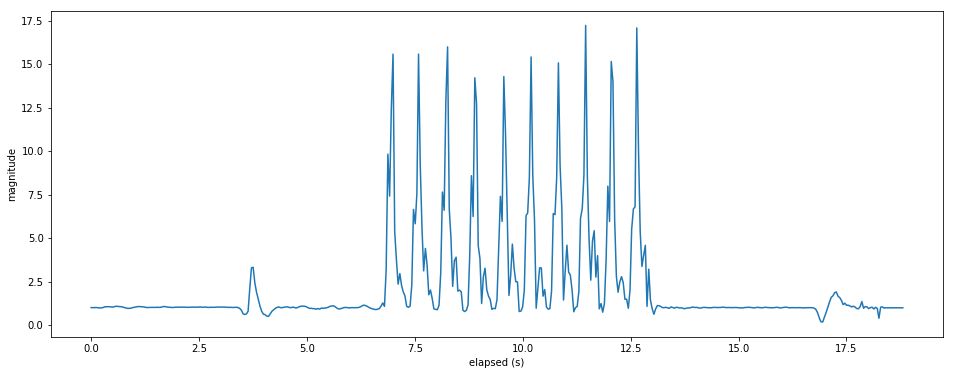

In [7]:
plt.figure(figsize=(16, 6))
sb.lineplot(df_jab["elapsed (s)"],df_jab["magnitude"])

In [8]:
events = sorted(list(df_jab.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(10)))

In [9]:
events

[6.994,
 7.585,
 8.258,
 8.889,
 9.561,
 10.193,
 10.825999999999999,
 11.457,
 12.05,
 12.642000000000001]

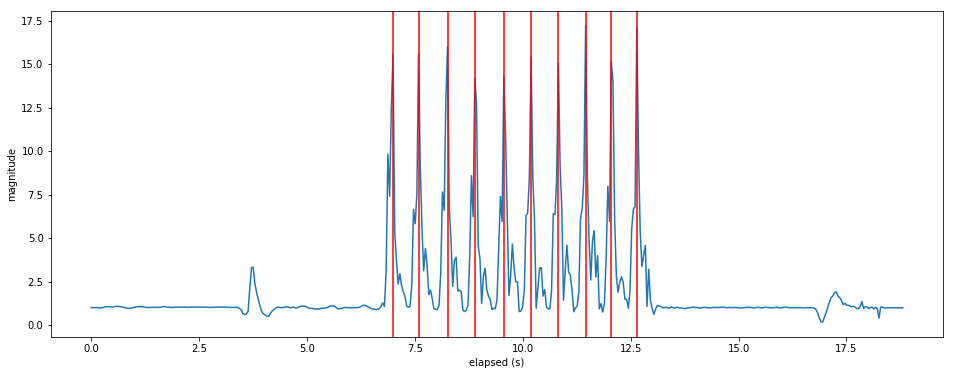

In [10]:
plt.figure(figsize=(16, 6))
sb.lineplot(df_jab["elapsed (s)"],df_jab["magnitude"])
for each in events:
    plt.axvline(each,color="r")

In [11]:
timestamps = df_jab.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(10).to_dict()

In [12]:
event_index = sorted(timestamps)

In [43]:
punches = []
for each in event_index:
    i = 10
    dummy = df_jab.iloc[each-i:each+i+1]
    dummy["time"] = list(np.linspace(0,(10*2+1)*0.04,(10*2+1)))
    punches.append(dummy)
    


/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


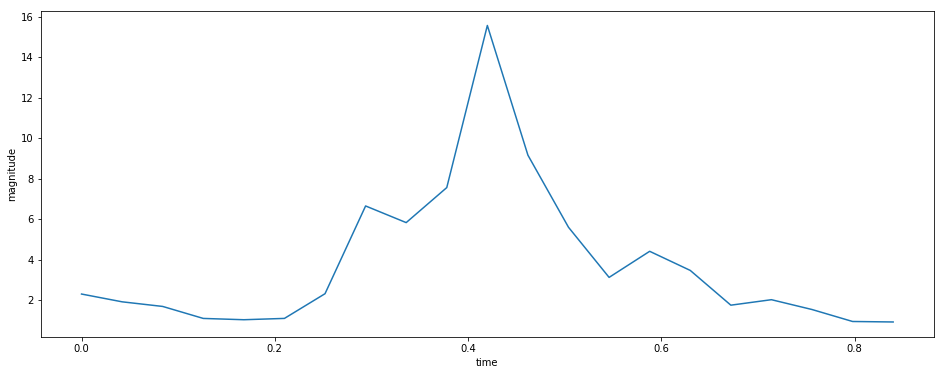

In [46]:
plt.figure(figsize=(16, 6))
sb.lineplot(punches[1]["time"],punches[1]["magnitude"])

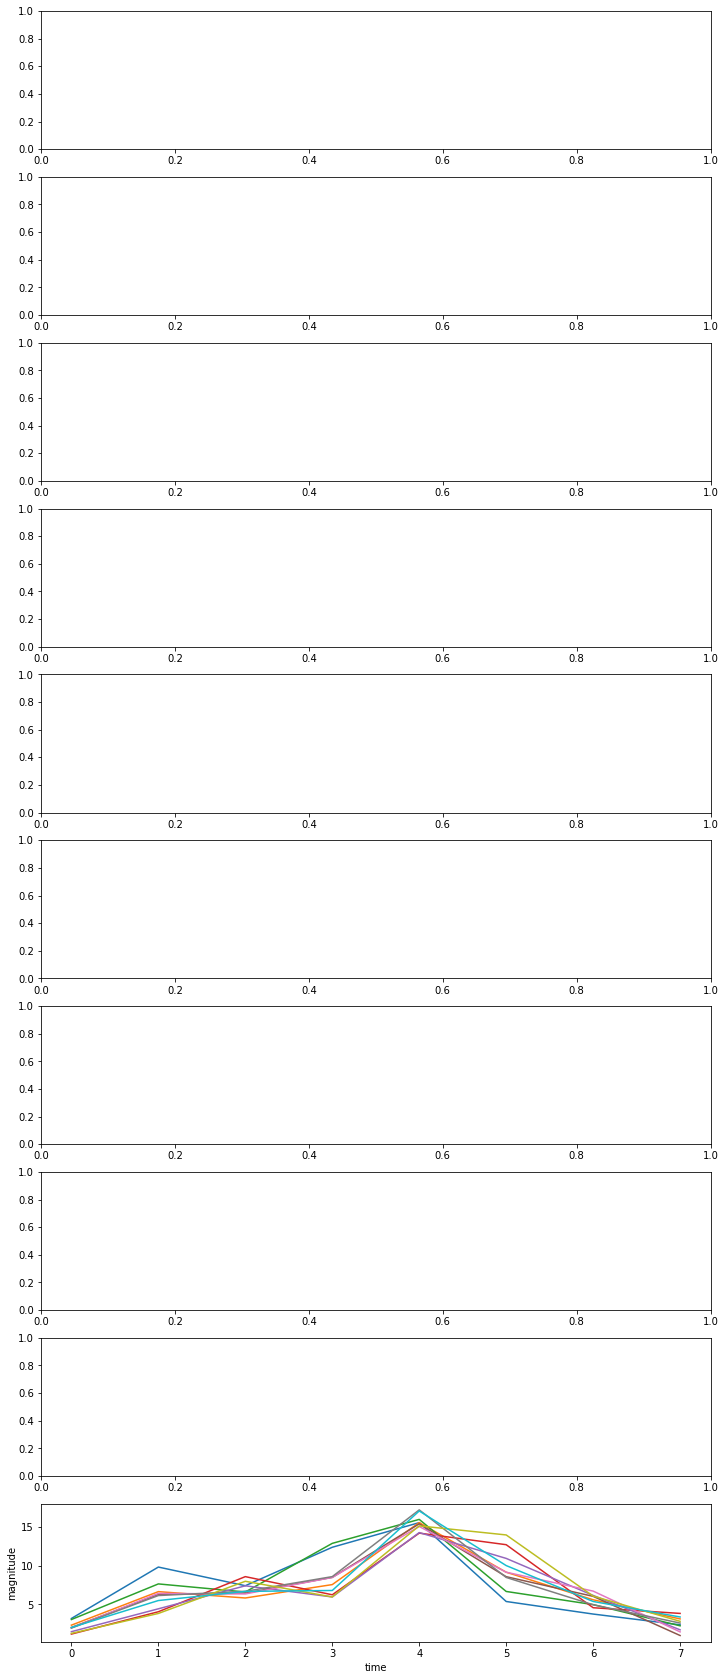

In [17]:
fig, axs = plt.subplots(10,1,figsize=(12,30))

for i,ax in enumerate(axs.flatten()):
    sb.lineplot(punches[i]["time"],punches[i]["magnitude"])

In [42]:
list(np.linspace(0,(10*2+1)*0.04,(10*2+1)))

[0.0,
 0.041999999999999996,
 0.08399999999999999,
 0.126,
 0.16799999999999998,
 0.20999999999999996,
 0.252,
 0.294,
 0.33599999999999997,
 0.37799999999999995,
 0.41999999999999993,
 0.46199999999999997,
 0.504,
 0.5459999999999999,
 0.588,
 0.6299999999999999,
 0.6719999999999999,
 0.714,
 0.7559999999999999,
 0.7979999999999999,
 0.84]

In [41]:
(10*2+1)*0.04

0.84